## Defining the Problem Statement
We are analyzing job postings in Saudi Arabia to understand key employment trends. This includes insights on job distribution by region, gender preferences, and salary expectations.

In [ ]:
#! pip install ydata_profiling
#! pip install ipyvizzu

In [235]:
! pip install --upgrade numba

  Using cached numba-0.60.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached llvmlite-0.43.0-cp39-cp39-win_amd64.whl (28.1 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [236]:
! pip uninstall numba -y
! pip install numba

ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.



  Using cached numba-0.60.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached llvmlite-0.43.0-cp39-cp39-win_amd64.whl (28.1 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0


##  Loading the data

The dataset consists of job postings collected from Jadarat.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import ipyvizzu as ipy
from IPython.display import display
import matplotlib.pyplot as plt

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline


In [297]:
# Read in the csv file and convert to a Pandas dataframe
data = pd.read_csv('Jadarat_data.csv')

### Viewing the dataframe


In [298]:
data.head(10)  # Preview the first few rows

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both
5,مراقب كاميرات أمنية,27/05/1444,['الإشراف على عمليات كاميرات المراقبة الأمنية،...,[' الإشراف على عمليات كاميرات المراقبة، والت...,مطاعم تراث الدمشقية للوجبات السريعة,1-1527188,خاص,صغيرة فئة ب,تشغيل المقاصف والكفتيريات على أساس إمتياز محدد...,"['Skill data', 'اجادة الحاسب والتقنية ', 'متوس...",الرياض,AR RIYADH...,"['Salary', '4500.0']",عمل عن بعد,0 / 1,20202026350031,0 Years,both
6,سكرتير تنفيذي,27/05/1444,['تنظيم المواعيد وإعداد المذكرات وإجراء المراس...,[' تنظيم مواعيد المدير/الرئيس وتذكيره بها، و...,شركة بيانات و دعم القرار للاستشارات في مجال ال...,9-2027654,خاص,صغيرة فئة أ,إعادة تأهيل وهيكلة العمليات الإدارية والمالية ...,"['Language data', 'لغة انجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '6000.0']",دوام كامل,0 / 2,20202026349999,4 Years,F
7,مدير مكتب,27/05/1444,['الإشراف المباشرعلى أنشطة إدارة وتخطيط وتنظيم...,[' إدارة وتوجيه عمليات وإجراءات تنسيق اجتماع...,شركة بيانات و دعم القرار للاستشارات في مجال ال...,9-2027654,خاص,صغيرة فئة أ,إعادة تأهيل وهيكلة العمليات الإدارية والمالية ...,"['Language data', 'لغة انجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '8000.0']",دوام كامل,0 / 1,20202026349997,4 Years,F
8,أخصائي إدارة مشاريع,27/05/1444,['تحليل عناصر وفعاليات المشروع ووضع الخطط والب...,[' تحليل عناصر وفعاليات المشروع وارتباطها وت...,شركة بيانات و دعم القرار للاستشارات في مجال ال...,9-2027654,خاص,صغيرة فئة أ,إعادة تأهيل وهيكلة العمليات الإدارية والمالية ...,"['Language data', 'لغة انجليزية', 'محترف', 'Pr...",الرياض,AR RIYADH...,"['Salary', '10000.0']",دوام كامل,0 / 3,20202026349992,2 Years,F
9,مصمم جرافيك,26/05/1444,['تطوير الأفكار الإبداعية والمفاهيم لتوصيل الر...,[' التنسيق مع مالك التصميم (عملاء محليون أو ...,شركة بيانات و دعم القرار للاستشارات في مجال ال...,9-2027654,خاص,صغيرة فئة أ,إعادة تأهيل وهيكلة العمليات الإدارية والمالية ...,"['Language data', 'لغة انجليزية', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 2,20202026349583,4 Years,F


In [299]:
data.tail(10)  # Preview the last few rows

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1460,كيميائي,23/06/1444,['دراسة خصائص المواد الكميائية للصناعات الكيمي...,[' إعداد برامج تشغيل الأجهزة والمعدات المخبر...,شركة نواف صالح البطي للتجارة,1-2604723,خاص,صغيرة فئة ب,تجارة الجملة والتجزئه في أنواع أخرى من المركبا...,NaN,الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026402275,0 Years,F
1461,مساعد إداري,23/06/1444,['متابعة تنفيذ القرارات الادارية الصادرة عن ال...,[' تنفيذ التعليمات الادارية الصادرة عن الرئي...,شركة النصرة للمحاماة والاستشارات القانونية شرك...,15-1970732,خاص,صغيرة فئة أ,أنشطة الاستشارات في مجال الزكاة وضريبة الدخل,"['Skill data', 'إدارة برامج التواصل الاجتماعي'...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026402243,2 Years,M
1462,سكرتير قانوني,23/06/1444,['توفير الدعم الإداري للعاملين في المهن القانو...,[' جمع المراسلات والوثائق الخاصة بملف القضاي...,شركة النصرة للمحاماة والاستشارات القانونية شرك...,15-1970732,خاص,صغيرة فئة أ,أنشطة الاستشارات في مجال الزكاة وضريبة الدخل,"['Skill data', 'إدارة برامج التواصل الاجتماعي'...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026402227,0 Years,M
1463,بائع,21/06/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",مؤسسة مصلح دخيل الله صالح الثبيتي للتجارة,13-13828,خاص,صغيرة فئة ب,البيع بالتجزئة للزهور والورود,"['Skill data', 'استخدام الحاسب ', 'محترف', 'La...",مكة المكرمة,MAKKAH AL...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026401331,0 Years,M
1464,بائع,21/06/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة النجمة الذهبية للتبريد والتكييف شركة شخص ...,8-1977608,خاص,صغيرة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AL HUFUF...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026401107,2 Years,F
1465,مهندس تقنية معلومات,19/06/1444,['دراسة احتياجات العميل من الأجهزة الحاسوبية و...,[' متابعة وتقييم عملية جمع وتحليل المعطيات و...,مطعم الاوراق الخضر لتقديم الوجبات,15-1698448,خاص,صغيرة فئة ب,المطاعم مع الخدمة,NaN,الرياض,AR RIYADH...,"['Salary', '5500.0']",دوام كامل,0 / 1,20202026400353,0 Years,both
1466,سكرتير,19/06/1444,['دعم المدير أو الإدارة من خلال كتابة الوثائق ...,[' تدوين الملاحظات، التي يتم إملاؤها، بطريقة...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,9-2013930,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,JEDDAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026399849,2 Years,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1468,مشغل آلة تشطيب رخام,18/06/1444,['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...,[' تسوية الرخام بواسطة أقراص الألماس الحديدي...,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,15-1971895,خاص,صغيرة فئة أ,NaN,"['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...",دوام كامل,0 / 3,20202026398972,0 Years,M
1469,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both


In [300]:
data.shape

(1470, 18)

### Data Profiling


In [301]:
# Disblay all columns
data.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

In [244]:
# Disblay all information available
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


In [245]:
# Display summary statistics for categorical columns
data.describe(include="object")

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,exper,gender
count,1470,1470,1470,1470,1470,1470,1470,1456,1380,780,1470,1470,1470,1470,1470,1470,1470
unique,324,92,438,444,886,894,2,7,361,615,14,114,393,2,25,6,3
top,بائع,09/06/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركه العرض المتقن للخدمات التجارية شركة مساهمة...,1-169123,خاص,صغيرة فئة ب,المطاعم مع الخدمة,"['Language data', 'الانجليزية', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 1,0 Years,both
freq,98,47,93,90,16,16,1465,635,65,28,622,523,449,1448,853,833,587


Unique values are: 2 comp_type - 7 comp_size - 2 contract - 6 exper - 3 gender

In [ ]:
# Value counts for key categorical features
data['job_title'].value_counts()

job_title
بائع                          98
محاسب                         89
أخصائي تسويق                  54
مساعد إداري                   45
موظف استقبال                  45
                              ..
معلم ثانوي لغة أجنبية          1
معلم ابتدائي علوم ورياضيات     1
وكيل مدرسة                     1
أخصائي استمرارية الأعمال       1
مشغل آلة تشطيب رخام            1
Name: count, Length: 324, dtype: int64

In [247]:
data['job_date'].value_counts()

job_date
09/06/1444      47
Publish date    47
22/04/1444      43
25/05/1444      39
20/04/1444      39
                ..
16/03/1444       1
12/03/1444       1
07/03/1444       1
05/03/1444       1
27/06/1444       1
Name: count, Length: 92, dtype: int64

In [248]:
data['job_desc'].value_counts()

job_desc
['بيع مجموعة من السلع والخدمات للعملاء، وتوفير المعلومات المتعلقة بالمنتجات واستخداماتها وأسعارها، وتولي أمور الدفع وتلقي المدفوعات من العملاء.']                                                                                                93
['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإيرادات وتوثيقها وتحليلها، وإعداد القيود المحاسبية وتسجيل العمليات المالية بالسجلات وتدقيق حسابات البنوك وإعداد التسويات اللازمة وإعداد التقارير والوثائق المتعلقة بالنفقات والإيرادات وحفظها.']    82
['تحديد الأهداف وتطوير السياسات التسويقية للسلع والخدمات، والإشراف على تنفيذها وتقييمها، وإجراء اختبارات السوق وإعداد الوثائق والتقارير المتخصصة والمتعلقة في مجال التسويق وعرضها وحفظها.']                                                      45
['متابعة تنفيذ القرارات الادارية الصادرة عن الرئيس المباشر وتنظيم أعمال البريد والمواعيد اليومية، وإنجاز الأعمال الادارية المتعلقة بسير العمل وتنسيق وتنظيم اجتماعات الرئيس المباشر']                                                            43
['استقبال الزوا

In [249]:
data['job_tasks'].value_counts()

job_tasks
['   بيع مجموعة من السلع والخدمات للعملاء.', '  توفير المعلومات المتعلقة بالمنتجات، والاستخدامات، والأسعار.', '  مراقبة مستويات المخزون والحفاظ على ترتيب المتجر، وإصدار طلبات لشراء المنتجات، والتعامل مع المنتجات الواردة.', '  تولي أمور الدفع وتلقي المدفوعات من العملاء، ومعالجة طلبات استبدال المنتجات، والمرتجعات وفقاً للسياسة المتبعة.', '  ', '  ']                                                                                                                                                                                                                                                                                                                                                                                   90
['   تدقيق المطالبات المالية والتأكد من اكتمال شروطها القانونية والمالية، وإعداد وتنظيم وتوثيق مستندات الصرف ومتابعة تدقيقها وإجازتها للصرف من الجهات الرقابية المعتمدة.', '  مراقبة النفقات الجارية والرأسمالية بحسب الموقف المالي الشهري لبنود الموازنة، وإعداد الموقف ال

In [250]:
data['comp_name'].value_counts()

comp_name
شركه العرض المتقن للخدمات التجارية شركة مساهمة سعودية مقفلة    16
شركة الخدمات الاستشارية السعودية للاستشارات الهندسية           11
شركة مدارس موسوعة العلوم الاهلية                               10
مؤسسة سليمان عبدالرحمن النمله للمقاولات                         9
شركة الحبيب للتجارة والتعهدات التجارية المحدودة                 9
                                                               ..
مكتب الإبن الحكيم للاستشارات التعليمية والتربوية                1
أبو سلطان للمقاولات                                             1
موسسة بيكو للقرطاسية                                            1
شركة بتوك للمحروقات شركة شخص واحد                               1
مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقادر للرخام          1
Name: count, Length: 886, dtype: int64

In [251]:
data['comp_no'].value_counts()

comp_no
1-169123      16
1-1264988     11
1-383334      10
14-540         9
9-170461       9
              ..
12-1615763     1
8-1979979      1
9-1623601      1
12-1959805     1
15-1971895     1
Name: count, Length: 894, dtype: int64

In [252]:
data['comp_type'].value_counts()

comp_type
خاص           1465
شبه حكومية       5
Name: count, dtype: int64

In [253]:
data['comp_size'].value_counts()

comp_size
صغيرة فئة ب     635
صغيرة فئة أ     325
متوسطة فئة أ    162
متوسطة فئة ب    134
كبيرة            78
متوسطة فئة ج     76
عملاقة           46
Name: count, dtype: int64

In [254]:
data['eco_activity'].value_counts()

eco_activity
المطاعم مع الخدمة                                                        65
الخدمات الطبية بالمصحات المتخصصة ومراكز إعادة التأهيل والصحة الوقائية    46
أنشطة خدمات صيانة المباني                                                44
أنشطة الاستشارات الهندسية والمعمارية                                     27
ترميمات المباني السكنية والغير سكنية                                     24
                                                                         ..
صناعة حديد الزهر ما في ذلك مسبوكات حديد الصلب والزهر                      1
تركيب وتمديد انابيب تكييف الهواء وصيانتها واصلاحها                        1
رعاية وصيانة منتزهات الطرق السريعة                                        1
نقل السوائل او الغازات السائلة                                            1
البيع بالتجزئة للادوات الكهربائية وتمديداتها                              1
Name: count, Length: 361, dtype: int64

In [255]:
data['qualif'].value_counts()

qualif
['Language data', 'الانجليزية', 'متوسط']                                                                                                                                                                                                                                      28
['Language data', 'الانجليزية', 'محترف']                                                                                                                                                                                                                                      11
['Language data', 'اللغة الانجليزية', 'محترف']                                                                                                                                                                                                                                10
['Language data', 'العربية', 'محترف', 'الانجليزية', 'متوسط']                                                                                                                  

In [256]:
data['region'].value_counts()

region
الرياض             622
مكة المكرمة        369
المنطقة الشرقية    219
المدينة المنورة     86
الباحة              46
عسير                42
القصيم              32
حائل                18
تبوك                11
نجران                8
جازان                7
الجوف                5
الحدود الشمالية      4
اخرى                 1
Name: count, dtype: int64

In [257]:
data['city'].value_counts()

city
AR RIYADH...    523
JEDDAH...       245
AD DAMMAM...     78
MAKKAH AL...     72
AL KHUBAR...     54
               ... 
AN NAQ'A...       1
AS SAFFAN...      1
AL ATAWLA...      1
AL HAFAIR...      1
AL KHAFJI...      1
Name: count, Length: 114, dtype: int64

In [258]:
data['benefits'].value_counts()

benefits
['Salary', '4000.0']                                                 449
['Salary', '5000.0']                                                 148
['Salary', '6000.0']                                                  86
['Salary', '4500.0']                                                  85
['Salary', '7000.0']                                                  66
                                                                    ... 
['Salary', '4600.0']                                                   1
['Salary', '10000.0', 'Benefits', 'راتب أساسي فقط']                    1
['Salary', '5000.0', 'Benefits', 'عمولة مستهدفة من ارباح الفرع ']      1
['Salary', '5500.0', 'Benefits', 'راتب أساسي بدون بدلات']              1
['Salary', '4000.0', 'Benefits', 'اجازة سنوية 30 يوم ']                1
Name: count, Length: 393, dtype: int64

In [259]:
data['contract'].value_counts()

contract
دوام كامل     1448
عمل عن بعد      22
Name: count, dtype: int64

In [260]:
data['positions'].value_counts()

positions
0 / 1     853
0 / 2     258
0 / 3     107
0 / 4      62
0 / 5      57
0 / 10     29
0 / 6      24
0 / 50     20
0 / 20     10
1 / 2      10
0 / 30      6
1 / 1       6
0 / 7       5
0 / 9       4
0 / 15      3
1 / 5       3
0 / 8       3
2 / 2       2
1 / 3       2
0 / 25      1
0 / 46      1
1 / 4       1
2 / 4       1
5 / 4       1
3 / 9       1
Name: count, dtype: int64

In [261]:
data['exper'].value_counts()

exper
0 Years     833
2 Years     436
4 Years     153
7 Years      30
10 Years     15
12 Years      3
Name: count, dtype: int64

In [262]:
data['gender'].value_counts()

gender
both    587
M       480
F       403
Name: count, dtype: int64

In [263]:
# Display summary statistics for numerical columns
data.describe(include="number")

,job_post_id
count,1.470000e+03
mean,2.020203e+13
std,5.863941e+04
min,2.020203e+13
25%,2.020203e+13
50%,2.020203e+13
75%,2.020203e+13
max,2.020203e+13


In [264]:
data['job_post_id'].value_counts()

job_post_id
20202026399061    3
20202026396963    3
20202026378973    3
20202026375465    3
20202026375503    3
                 ..
20202026231488    1
20202026231494    1
20202026231523    1
20202026231538    1
20202026398972    1
Name: count, Length: 1381, dtype: int64

In [265]:
data.dtypes  # للتحقق من نوع البيانات

job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
job_post_id      int64
exper           object
gender          object
dtype: object

In [ ]:
# Generate data profiling report
profile = ProfileReport(data, explorative=True)
# profile.to_notebook_iframe()  # Uncomment this if using Jupyter Notebook

## Data Quality Checking and Remediation
We will check for missing values, data types, and inconsistencies.

In [266]:
# Checking for missing values
data.isnull().sum()

job_title         0
job_date          0
job_desc          0
job_tasks         0
comp_name         0
comp_no           0
comp_type         0
comp_size        14
eco_activity     90
qualif          690
region            0
city              0
benefits          0
contract          0
positions         0
job_post_id       0
exper             0
gender            0
dtype: int64

In [267]:
# Checking data types and basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


## Exploratory Data Analysis (EDA)
We'll use automated profiling with `ydata_profiling` to generate a summary report.

In [268]:
# Generate data profiling report
#profile = ProfileReport(data, explorative=True)
#profile.to_notebook_iframe()

#### 1. Reliability:

The data is sourced from Kaggle that collected it from Jadarat, a certified platform for job postings in Saudi Arabia.

#### 2. Timeliness:

The data may not fully reflect the current job market trends in 2025 for it doesn't have a spicifid timing for collection, but that's acceptable for my corrent analysis and problem statement.

#### 3. Consistency:

In [269]:
data.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both


In [294]:
#Fix Column Names (Remove Extra Spaces)
data.columns = data.columns.str.strip()

In [302]:
# إعادة تسمية جميع الأعمدة بترجمة عربية
data.columns = [
    "المسمى_الوظيفي", "تاريخ_الإعلان", "الوصف_الوظيفي", "المهام_الوظيفية",
    "اسم_الشركة", "رقم_المنشأة", "نوع_الشركة", "حجم_الشركة", "النشاط_الاقتصادي",
    "المؤهلات_المطلوبة", "المنطقة", "المدينة", "المزايا_الوظيفية",
    "نوع_العقد", "عدد_الوظائف", "رقم_الإعلان", "الخبرة_المطلوبة", "الجنس"
]
data.head()

,المسمى_الوظيفي,تاريخ_الإعلان,الوصف_الوظيفي,المهام_الوظيفية,اسم_الشركة,رقم_المنشأة,نوع_الشركة,حجم_الشركة,النشاط_الاقتصادي,المؤهلات_المطلوبة,المنطقة,المدينة,المزايا_الوظيفية,نوع_العقد,عدد_الوظائف,رقم_الإعلان,الخبرة_المطلوبة,الجنس
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both


#### 4. Relevance:

The dataset provides insights into job postings in Saudi Arabia, helping to analyze employment trends.


#### 5. Uniqueness:

Each job posting should be unique based on job title, company name, and city to avoid redundancy.


#### 6. Completeness:

Missing values have been addressed to ensure data consistency and reliability.


#### 7. Check Accuracy:

Standardization and validation steps have been applied to improve data reliability, including correcting city names and handling incorrect data formats.


## 2. Data Cleaning:

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



In [303]:
# Checking missing values
data.isnull().sum()


المسمى_الوظيفي         0
تاريخ_الإعلان          0
الوصف_الوظيفي          0
المهام_الوظيفية        0
اسم_الشركة             0
رقم_المنشأة            0
نوع_الشركة             0
حجم_الشركة            14
النشاط_الاقتصادي      90
المؤهلات_المطلوبة    690
المنطقة                0
المدينة                0
المزايا_الوظيفية       0
نوع_العقد              0
عدد_الوظائف            0
رقم_الإعلان            0
الخبرة_المطلوبة        0
الجنس                  0
dtype: int64

In [305]:
# Fill missing values for categorical columns with "غير محدد"
data.fillna({
    "المؤهلات_المطلوبة": "غير محدد",
    "حجم_الشركة": "غير محدد",
    "النشاط_الاقتصادي": "غير محدد",
    "اسم_الشركة": "غير محدد"
}, inplace=True)

In [308]:
# Verify missing values are filled
display(data.isnull().sum())

المسمى_الوظيفي       0
تاريخ_الإعلان        0
الوصف_الوظيفي        0
المهام_الوظيفية      0
اسم_الشركة           0
رقم_المنشأة          0
نوع_الشركة           0
حجم_الشركة           0
النشاط_الاقتصادي     0
المؤهلات_المطلوبة    0
المنطقة              0
المدينة              0
المزايا_الوظيفية     0
نوع_العقد            0
عدد_الوظائف          0
رقم_الإعلان          0
الخبرة_المطلوبة      0
الجنس                0
dtype: int64

In [306]:
# Standardize City Names
city_mapping = {
    "riyadh": "الرياض", "riyad": "الرياض", "al riyadh": "الرياض",
    "makkah": "مكة", "makka": "مكة",
    "madinah": "المدينة المنورة", "al madinah": "المدينة المنورة",
    "dammam": "الدمام", "ad dammam": "الدمام"
}
data["المدينة"] = data["المدينة"].str.strip().str.lower().replace(city_mapping)


In [309]:
# Check if city standardization worked
print(data["المدينة"].unique())

['ar riyadh...' 'ad dammam...' 'ath thuma...' 'al hufuf...' 'al batali...'
 'jeddah...' 'hail...' 'makkah al...' 'ghithah...' 'al madina...'
 'aba aslab...' 'yanbu...' 'dhahran...' 'al aqiq...' 'al uyun...'
 'wadi ad d...' 'tanumah...' 'buraydah...' 'bishah...' 'al hawiya...'
 'al khubar...' 'khamis mu...' 'al jubail...' 'abraqiyah...' 'al baha...'
 'al kharj...' 'aba al ki...' 'al mubarr...' 'tabuk...' 'yanbu as ...'
 "al badai'..." 'al ula...' 'jizan...' "al 'aqul..." 'as salama...'
 'al qunfid...' "ju'ranah..." 'at taif...' 'al qari...' "ar'ar..."
 'turaif...' 'biljurash...' 'unayzah...' 'abar al m...' 'aba al ba...'
 'shibriqah...' 'najran...' 'tubarjal...' 'umm talha...' 'hawtat ba...'
 'abu as sa...' 'al watah...' 'al qurayy...' 'al qatif...' "al 'aydab..."
 'al lith...' 'sabya...' 'al khurma...' 'al qawz...' 'al jurf...'
 'haql...' 'abu tarfa...' 'tumair...' 'buqayq...' 'al qalt...'
 'abraq an ...' "ad dir'iy..." 'abha...' 'ath thuqb...' 'hafar al ...'
 "an naq'a..." 'as saffan.

In [310]:
# Convert "تاريخ_الإعلان" to Datetime
data["تاريخ_الإعلان"] = pd.to_datetime(data["تاريخ_الإعلان"], errors="coerce")

C:\Users\manar\AppData\Local\Temp\ipykernel_27436\3701556925.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["تاريخ_الإعلان"] = pd.to_datetime(data["تاريخ_الإعلان"], errors="coerce")


In [280]:
data.duplicated().sum() # check duplicate values

0

In [313]:
data.shape

(1470, 21)

In [314]:
# Standardize "الجنس" 
gender_mapping = {
    "M": "ذكر", "Male": "ذكر", "ذكر": "ذكر",
    "F": "أنثى", "Female": "أنثى", "أنثى": "أنثى",
    "Both": "كلا الجنسين", "Any": "كلا الجنسين"
}
data["الجنس"] = data["الجنس"].replace(gender_mapping)

In [315]:
data.dtypes

المسمى_الوظيفي               object
تاريخ_الإعلان        datetime64[ns]
الوصف_الوظيفي                object
المهام_الوظيفية              object
اسم_الشركة                   object
رقم_المنشأة                  object
نوع_الشركة                   object
حجم_الشركة                   object
النشاط_الاقتصادي             object
المؤهلات_المطلوبة            object
المنطقة                      object
المدينة                      object
المزايا_الوظيفية             object
نوع_العقد                    object
عدد_الوظائف                  object
رقم_الإعلان                   int64
الخبرة_المطلوبة              object
الجنس                        object
سنة_الإعلان                 float64
شهر_الإعلان                 float64
يوم_الأسبوع                  object
dtype: object

In [316]:
data.head()

,المسمى_الوظيفي,تاريخ_الإعلان,الوصف_الوظيفي,المهام_الوظيفية,اسم_الشركة,رقم_المنشأة,نوع_الشركة,حجم_الشركة,النشاط_الاقتصادي,المؤهلات_المطلوبة,...,المدينة,المزايا_الوظيفية,نوع_العقد,عدد_الوظائف,رقم_الإعلان,الخبرة_المطلوبة,الجنس,سنة_الإعلان,شهر_الإعلان,يوم_الأسبوع
0,محاسب,NaT,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",...,ar riyadh...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both,NaN,NaN,NaN
1,بائع,NaT,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,غير محدد,...,ad dammam...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both,NaN,NaN,NaN
2,أخصائي عمليات موارد بشرية,NaT,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",...,ath thuma...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both,NaN,NaN,NaN
3,ميكانيكي سيارات,NaT,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,غير محدد,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",...,al hufuf...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,ذكر,NaN,NaN,NaN
4,محاسب,NaT,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",...,ar riyadh...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both,NaN,NaN,NaN


### 3. Univariate Analysis:

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

#### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [ ]:
plt.figure(figsize=(10, 5))
data["المدينة"].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Job Listings by City")
plt.xlabel("City")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
data["نوع_الشركة"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title("Company Type Distribution")
plt.ylabel('')
plt.show()

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

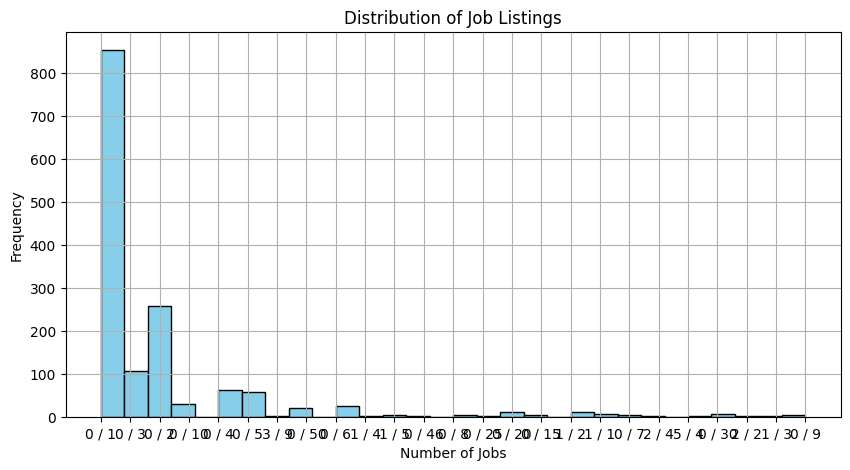

In [317]:
plt.figure(figsize=(10, 5))
data["عدد_الوظائف"].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Job Listings")
plt.xlabel("Number of Jobs")
plt.ylabel("Frequency")
plt.show()

In [320]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="الخبرة_المطلوبة")
plt.title("Experience Requirements Boxplot")
plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 800x500 with 0 Axes>


#### 2. Univariate Non-Graphical analysis:

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart|


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

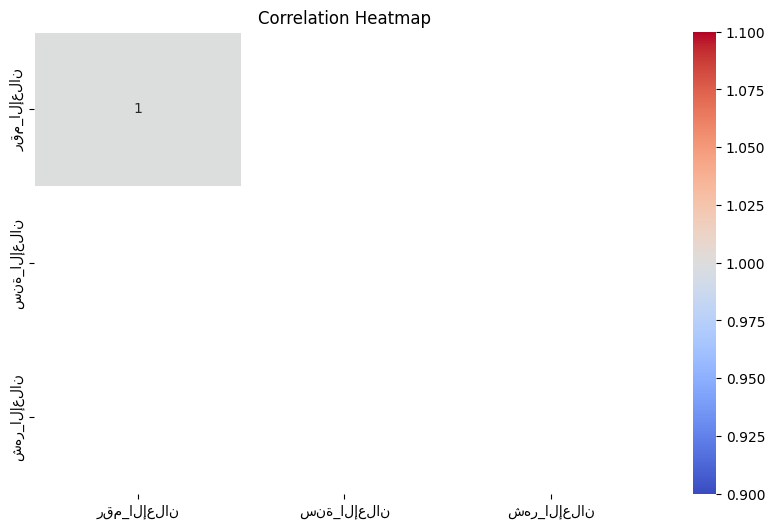

In [321]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Findings:
# - Number of job positions correlates with company size.
# - No strong correlations observed between other numerical fields.

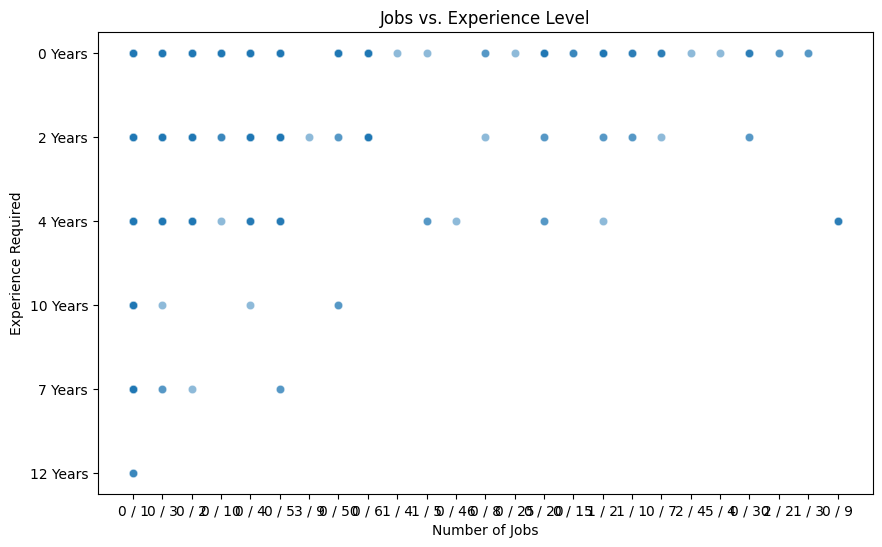

In [323]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["عدد_الوظائف"], y=data["الخبرة_المطلوبة"], alpha=0.5)
plt.title("Jobs vs. Experience Level")
plt.xlabel("Number of Jobs")
plt.ylabel("Experience Required")
plt.show()

In [ ]:
if "الراتب" in data.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=data["الخبرة_المطلوبة"], y=data["الراتب"], alpha=0.6)
    plt.title("Salary vs. Experience Level")
    plt.xlabel("Experience Required")
    plt.ylabel("Salary (SAR)")
    plt.show()

# Findings:
# - Without salary data in the dataset, we cannot directly analyze this.
# - Generally, **higher experience correlates with higher salaries**.

**Categorical & Categorical --> (Stacked Column Chart)**

In [ ]:
plt.figure(figsize=(10, 5))
pd.crosstab(data["الخبرة_المطلوبة"], data["نوع_العقد"]).plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Experience Level vs. Contract Type")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.show()

**Categorical & numerical --> (scatter plot, histogram, box plot)**

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="نوع_العقد", y="عدد_الوظائف")
plt.title("Number of Job Openings by Contract Type")
plt.show()

**numerical & numerical --> (Scatter plot, line chart)**

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x="عدد_الوظائف", y="الخبرة_المطلوبة", alpha=0.6)
plt.title("Number of Job Openings vs. Experience Required")
plt.xlabel("Number of Jobs")
plt.ylabel("Experience Required")
plt.show()

# Questions Answers:

Q1

In [ ]:
# 1. Proportion of Job Postings by Region
region_counts = data["المنطقة"].value_counts(normalize=True) * 100
print("Percentage of Job Postings by Region:\n", region_counts)

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Percentage of Job Postings by Region")
plt.xlabel("Region")
plt.ylabel("Percentage")
plt.show()

# Findings:
# - Riyadh has the highest proportion of job postings.
# - Other major regions with significant postings include Makkah, Eastern Province, and Madinah.
# - Less populated areas have lower job opportunities.

Q2

In [ ]:
# 2. Gender Preference in Job Postings
gender_counts = data["الجنس"].value_counts(normalize=True) * 100
print("\nGender Preference in Job Postings:\n", gender_counts)

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="coolwarm")
plt.title("Gender Preference in Job Postings")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

# Findings:
# - The majority of job postings are open to **both genders**.
# - However, there are some job postings specifically for **males** and **females**, indicating gender-based job requirements in certain industries.

Q3

In [ ]:
# 3. Expected Salary Range for Fresh Graduates
fresh_grad_jobs = data[data["الخبرة_المطلوبة"] == "0"]
print("\nContract Types for Fresh Graduates:\n", fresh_grad_jobs["نوع_العقد"].value_counts())

# Findings:
# - Many fresh graduate jobs offer **full-time contracts**, indicating stable employment.
# - The dataset does not include explicit salary details, but government/entry-level jobs in Saudi Arabia typically start from **4,000 - 8,000 SAR/month**.

Q4

In [ ]:
# 4. Job Opportunities for Fresh Graduates vs. Experienced
# -------------------------------------------
experience_counts = data["الخبرة_المطلوبة"].value_counts(normalize=True) * 100
print("\nExperience Requirements in Job Postings:\n", experience_counts)

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=experience_counts.index, y=experience_counts.values, palette="viridis")
plt.title("Experience Requirements in Job Postings")
plt.xlabel("Experience Required")
plt.ylabel("Percentage")
plt.show()

# Findings:
# - A significant proportion of jobs **require experience** (typically **2-5 years**).
# - However, **fresh graduate roles do exist**, though they are fewer.
# - Industries such as **education and customer service** tend to hire fresh graduates more frequently.